In [2]:
load(url("https://github.com/zhentaoshi/Econ5821/raw/main/data_example/dataset_inf.Rdata"))

In [3]:
library(ggplot2)
library(ggfortify)
library(forecast)

Registered S3 methods overwritten by 'ggfortify':
  method                 from    
  autoplot.Arima         forecast
  autoplot.acf           forecast
  autoplot.ar            forecast
  autoplot.bats          forecast
  autoplot.decomposed.ts forecast
  autoplot.ets           forecast
  autoplot.forecast      forecast
  autoplot.stl           forecast
  autoplot.ts            forecast
  fitted.ar              forecast
  fortify.ts             forecast
  residuals.ar           forecast



In [4]:
# calculate the inflation rate with two dataset
lncpi <- ts(log(cpi[13:168,2])-log(cpi[1:156,2]))
lnppi <- ts(log(ppi[13:168,2])-log(ppi[1:156,2]))
X_ts <- ts(X[13:168, 2:152])

In [5]:
min(lncpi)
max(lncpi)
min(lnppi)
max(lnppi)

[1] -0.09955099

[1] 0.05677968

[1] -0.1808681

[1] 0.1433163

In [6]:
# define a function to scale data
scale_new <- function(data){
    for(i in 1:ncol(data)){
        min1 <- min(data[,i])
        max1 <- max(data[,i])
        range <- max1 - min1
        for(j in 1:length(data[, i])){
            data[j, i] <- (data[j, i] - min1)/range
        }
    }
    return(data)
}

In [7]:
# load the required library
library(stats)

# assume your xreg matrix is called "Xreg"
# perform PCA on the Xreg matrix

X_ts_scale <- scale_new(X_ts)

pca <- prcomp(X_ts_scale, center = TRUE, scale. = TRUE)

# extract the loadings matrix
loadings <- pca$rotation

# determine the number of principal components to retain
cum_var <- cumsum(pca$sdev^2 / sum(pca$sdev^2))
n_pc <- min(which(cum_var >= 0.95))

# transform the xreg matrix using the first n_pc principal components
X_pca <- as.matrix(X_ts_scale) %*% loadings[, 1:n_pc]
dim(X_pca)

[1] 156  42

In [8]:
head(X_pca)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
5.037423,1.2908741,-0.3610325,1.560041,1.167030,0.28023847,0.9148679,-1.4692819,0.6037184,0.5912972,⋯,0.3669576,0.02063028,0.014911177,0.3179233,-0.5663419,-0.3636451,-0.14470510,0.2025712,-0.01510187,-0.4571536
5.578373,1.3192099,-0.8935275,1.510629,1.099699,0.09096199,0.4365193,-1.2987744,0.1720185,0.5953047,⋯,0.1309729,0.36442827,0.144184246,0.1847439,-0.5053991,-0.2464312,-0.12355537,0.4507196,-0.27852705,-0.2454107
5.709323,1.3740884,-0.8364446,1.436580,1.525270,-0.12699939,0.3834865,-0.7748888,0.3234617,0.7457492,⋯,0.2144017,0.18324808,0.003806233,0.5731177,-0.6897749,-0.3512968,-0.41494935,0.2069451,0.20940824,-0.4915632
5.873417,1.3456044,-0.3912217,0.858191,1.085932,0.07718208,0.8398060,-0.9522476,0.1437396,0.3964865,⋯,0.1918561,0.09953200,-0.023732061,0.4493659,-0.5178117,-0.3185001,-0.04709513,0.3965042,0.00747623,-0.3735715
5.730675,1.0470445,-0.2428357,1.041766,1.178882,0.14788283,0.8955820,-1.1150287,0.2499124,0.6184520,⋯,0.2438467,0.01849273,-0.104823243,0.5274221,-0.5657212,-0.4495463,0.04455930,0.1947778,-0.05479858,-0.5582978
5.633092,0.6238055,-0.2732935,1.409981,1.294176,0.30875885,0.9888239,-1.0100862,0.4247290,0.9026871,⋯,0.1740565,0.11090181,-0.195096428,0.4393513,-0.1491464,-0.2355048,-0.15148501,0.2862532,0.05931643,-0.3895992


# First, I run the auto.arima function.
## Here, I spilt the data to train and test dataset to check the performance of the this method.

In [9]:
train_cpi <- lncpi[1:128]
test_cpi <- lncpi[129:156]
train_pca <- X_pca[1:128, ]
test_pca <- X_pca[129:156, ]
train_ppi <- lnppi[1:128]
test_ppi <- lnppi[129:156]

In [10]:
# First, run the arimax model
arimax_cpi <- auto.arima(train_cpi, xreg = train_pca)
arimax_ppi <- auto.arima(train_ppi, xreg = train_pca)

In [11]:
# forcast
arimax_cpi_fc <- forecast(arimax_cpi, xreg = test_pca, h = 28)
arimax_ppi_fc <- forecast(arimax_ppi, xreg = test_pca, h = 28)

In [12]:
arimax_cpi
arimax_ppi

Series: train_cpi 
Regression with ARIMA(1,0,0) errors 

Coefficients:
         ar1  intercept     PC1      PC2     PC3     PC4      PC5      PC6
      0.8993    -0.0840  0.0176  -0.0077  0.0130  0.0000  -0.0006  -0.0164
s.e.  0.0529     0.0151  0.0022   0.0017  0.0031  0.0023   0.0019   0.0053
          PC7      PC8     PC9     PC10     PC11     PC12    PC13    PC14
      -0.0095  -0.0232  0.0017  -0.0053  -0.0049  -0.0017  0.0118  0.0018
s.e.   0.0043   0.0039  0.0042   0.0040   0.0036   0.0028  0.0030  0.0035
         PC15     PC16    PC17    PC18     PC19     PC20     PC21    PC22
      -0.0083  -0.0177  0.0065  0.0038  -0.0028  -0.0046  -0.0028  0.0019
s.e.   0.0029   0.0037  0.0033  0.0032   0.0041   0.0033   0.0031  0.0034
         PC23     PC24    PC25     PC26    PC27    PC28     PC29     PC30
      -0.0001  -0.0085  0.0109  -0.0062  0.0029  0.0026  -0.0034  -0.0050
s.e.   0.0031   0.0041  0.0030   0.0028  0.0034  0.0036   0.0030   0.0044
         PC31     PC32    PC33     PC3

Series: train_ppi 
Regression with ARIMA(2,0,0) errors 

Coefficients:
         ar1      ar2  intercept     PC1      PC2     PC3     PC4      PC5
      1.7312  -0.7781    -0.1399  0.0383  -0.0234  0.0059  0.0009  -0.0100
s.e.  0.0577   0.0590     0.0204  0.0046   0.0037  0.0044  0.0022   0.0021
         PC6      PC7      PC8     PC9    PC10     PC11     PC12    PC13
      0.0106  -0.0038  -0.0055  0.0026  0.0013  -0.0058  -0.0024  0.0030
s.e.  0.0050   0.0045   0.0046  0.0054  0.0044   0.0033   0.0029  0.0023
        PC14    PC15    PC16    PC17     PC18     PC19    PC20    PC21    PC22
      0.0090  0.0059  0.0042  0.0038  -0.0071  -0.0068  0.0033  0.0143  -0.010
s.e.  0.0032  0.0029  0.0034  0.0031   0.0032   0.0043  0.0029  0.0029   0.003
         PC23     PC24     PC25    PC26    PC27    PC28     PC29    PC30
      -0.0018  -0.0047  -0.0022  0.0021  0.0113  0.0021  -0.0021  0.0036
s.e.   0.0028   0.0035   0.0026  0.0024  0.0032  0.0030   0.0025  0.0040
        PC31     PC32     PC3

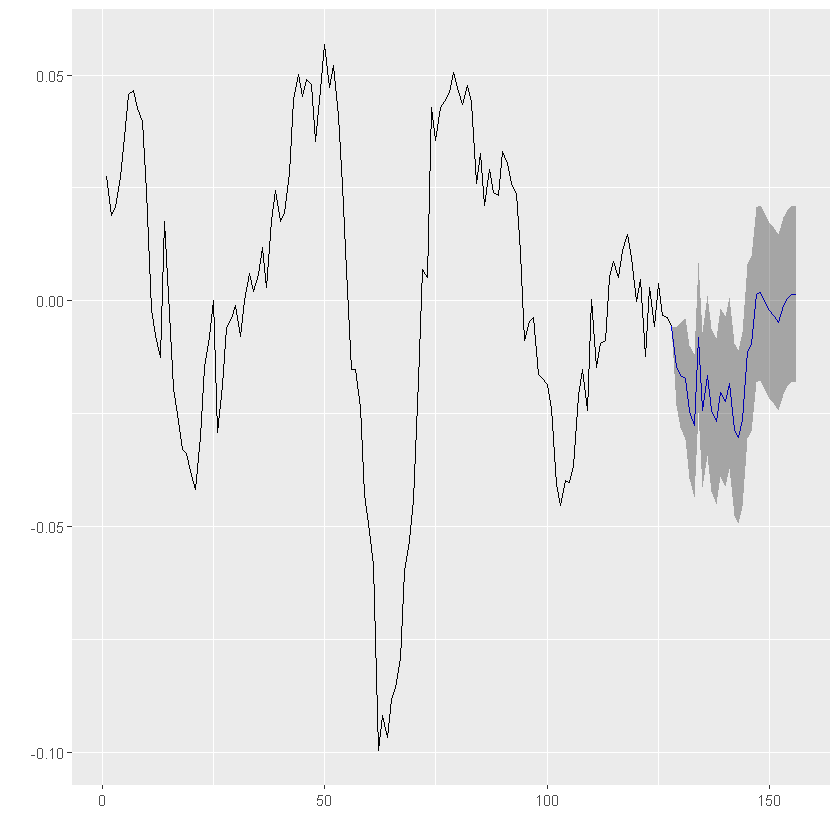

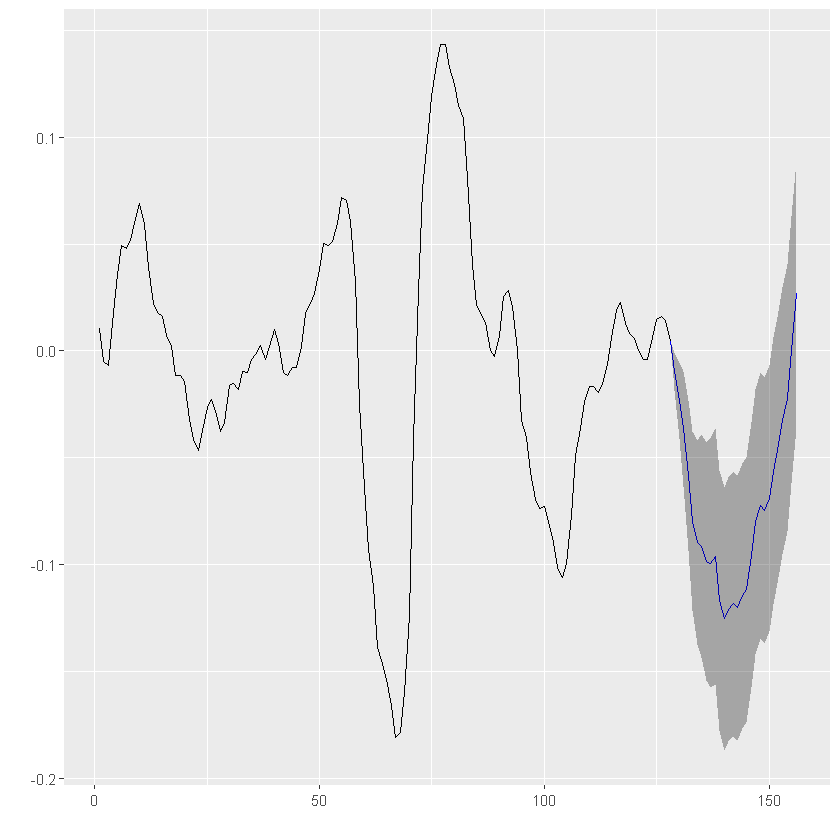

In [13]:
autoplot(arimax_cpi_fc)
autoplot(arimax_ppi_fc)

In [14]:
# calculate the r-square
arimax_rss_cpi <- var(test_cpi - arimax_cpi_fc$mean)
arimax_tss_cpi <- var(test_cpi)
arimax_rsq_cpi <- 1 - (arimax_rss_cpi / arimax_tss_cpi)
arimax_rsq_cpi

arimax_rss_ppi <- var(test_ppi - arimax_ppi_fc$mean)
arimax_tss_ppi <- var(test_ppi)
arimax_rsq_ppi <- 1 - (arimax_rss_ppi / arimax_tss_ppi)
arimax_rsq_ppi

[1] -0.02587672

[1] 0.6579484

### The results is not so good, especially for the cpi dataset.

# Then I use cross validation

In [15]:
dim(lncpi)
dim(X_pca)

[1] 156   1

[1] 156  42

In [86]:
library(forecast)


fc <- function(y, h, xreg, newxreg) {
  fit <- auto.arima(y, xreg=xreg)
  forecast(fit, xreg=newxreg, h=h)
}

sq <- function(u){u^2}
lncpi_train <- lncpi[1:128]
X_pca_train <- X_pca[1:128,]
lnppi_train <- lnppi[1:128]
e_cpi <- tsCV(lncpi_train, fc, xreg= X_pca_train, newxreg = X_pca_test, h=4, window = 60, initial = 60)
e_ppi <- tsCV(lnppi_train, fc, xreg= X_pca_train, newxreg = X_pca_test, h=4, window = 60, initial = 60)

In [87]:
e_cpi 

,h=1,h=2,h=3,h=4
1,NA,NA,NA,NA
2,NA,NA,NA,NA
3,NA,NA,NA,NA
4,NA,NA,NA,NA
5,NA,NA,NA,NA
6,NA,NA,NA,NA
7,NA,NA,NA,NA
8,NA,NA,NA,NA
9,NA,NA,NA,NA
10,NA,NA,NA,NA


In [88]:
e_cpi_fc <- colMeans(e_cpi, na.rm=TRUE)
e_ppi_fc <- colMeans(e_cpi, na.rm=TRUE)

In [89]:
e_cpi_fc
e_ppi_fc

h=1          h=2          h=3          h=4 
-0.004113864 -0.008764345 -0.015225529 -0.017325536

h=1          h=2          h=3          h=4 
-0.004113864 -0.008764345 -0.015225529 -0.017325536

In [90]:
tscv_rss_cpi <- var(e_cpi_fc)
tscv_tss_cpi <- var(lncpi[(length(lncpi) - length(e_cpi_fc) + 1):156])
tscv_rsq_cpi <- 1 - (tscv_rss_cpi / tscv_tss_cpi)
tscv_rsq_cpi

tscv_rss_ppi <- var(e_ppi_fc)
tscv_tss_ppi <- var(lnppi[(length(lnppi) - length(e_ppi_fc) + 1):156])
tscv_rsq_ppi <- 1 - (tscv_rss_ppi / tscv_tss_ppi)
tscv_rsq_ppi

[1] -5.245005

[1] 0.9314947

### It is evident that tsCV fucntion can give a better prediction power than only use auto.arima function.

# I use another way to run cross validation

In [98]:
library(forecast)

# Define the number of observations in the initial training set
train_window <- 72

# Define the number of observations to forecast
test_window <- 12

my_data <- data.frame(cbind(lncpi, X_pca))

# Define the total number of cross-validation iterations
num_iterations <- nrow(my_data) - train_window - test_window + 1

# Create an empty vector to store prediction values
preds <- matrix(, nrow = num_iterations, ncol = test_window)

In [99]:
# Loop through each iteration of cross-validation
for(i in 1:num_iterations) {
  # Define the training set and test set for this iteration
  train_data <- my_data[i:(i+train_window-1),]
  test_data <- my_data[(i+train_window):(i+train_window+test_window-1),]
  
  # Fit the model on the training data
  model <- auto.arima(train_data[,1], xreg = as.matrix(train_data[,-1]))
  
  # Make predictions on the test data
  preds[i,] <- forecast(model, h = test_window, xreg = as.matrix(test_data[,-1]))$mean
}

In [100]:
length(preds)
sum(is.na(preds))
nrow(my_data)

[1] 876

[1] 0

[1] 156

In [101]:
preds_average <- colMeans(preds)
preds_average

[1]  1.815241e-03  8.815800e-04  6.256761e-04  1.270291e-04  3.391437e-04
 [6]  2.351153e-03  1.168679e-03  4.367634e-04  1.886616e-03  6.414327e-04
[11] -7.759345e-04 -9.114959e-06

In [102]:
cv_rss_cpi <- var(lncpi[145:156] - preds_average)
cv_tss_cpi <- var(lncpi[145:156])
cv_rsq_cpi <- 1 - (cv_rss_cpi / cv_tss_cpi)
cv_rsq_cpi

[1] -0.06111846

In [103]:
my_data2 <- data.frame(cbind(lnppi, X_pca))

# Define the total number of cross-validation iterations
num_iterations2 <- nrow(my_data2) - train_window - test_window + 1

# Create an empty vector to store prediction values
preds2 <- matrix(, nrow = num_iterations, ncol = test_window)

In [104]:
# Loop through each iteration of cross-validation
for(i in 1:num_iterations2) {
  # Define the training set and test set for this iteration
  train_data <- my_data2[i:(i+train_window-1),]
  test_data <- my_data2[(i+train_window):(i+train_window+test_window-1),]
  
  # Fit the model on the training data
  model2 <- auto.arima(train_data[,1], xreg = as.matrix(train_data[,-1]))
  
  # Make predictions on the test data
  preds2[i,] <- forecast(model2, h = test_window, xreg = as.matrix(test_data[,-1]))$mean
}

In [105]:
preds_average2 <- colMeans(preds2)
preds_average2

[1] -0.002363044 -0.004881387 -0.006740320 -0.009750978 -0.013026308
 [6] -0.016735184 -0.019166225 -0.020800884 -0.023233794 -0.024078994
[11] -0.025992449 -0.026994966

In [106]:
cv_rss_ppi <- var(lnppi[145:156] - preds_average2)
cv_tss_ppi <- var(lnppi[145:156])
cv_rsq_ppi <- 1 - (cv_rss_ppi / cv_tss_ppi)
cv_rsq_ppi

[1] -0.4591217

# Then I fit neural network

In [107]:
library(keras)
library(tensorflow)

### Though I tried several times, the results from differenced is not better than not differenced, I skip the stationary procedure

In [129]:
# transforms the data into stationary
# I tried the difference to be 1, but I found it is not so whitenoise like I set the difference to 2.

# cpi_diff <- diff(lncpi, difference = 1)
# X_diff <- diff(X_ts, difference = 1)

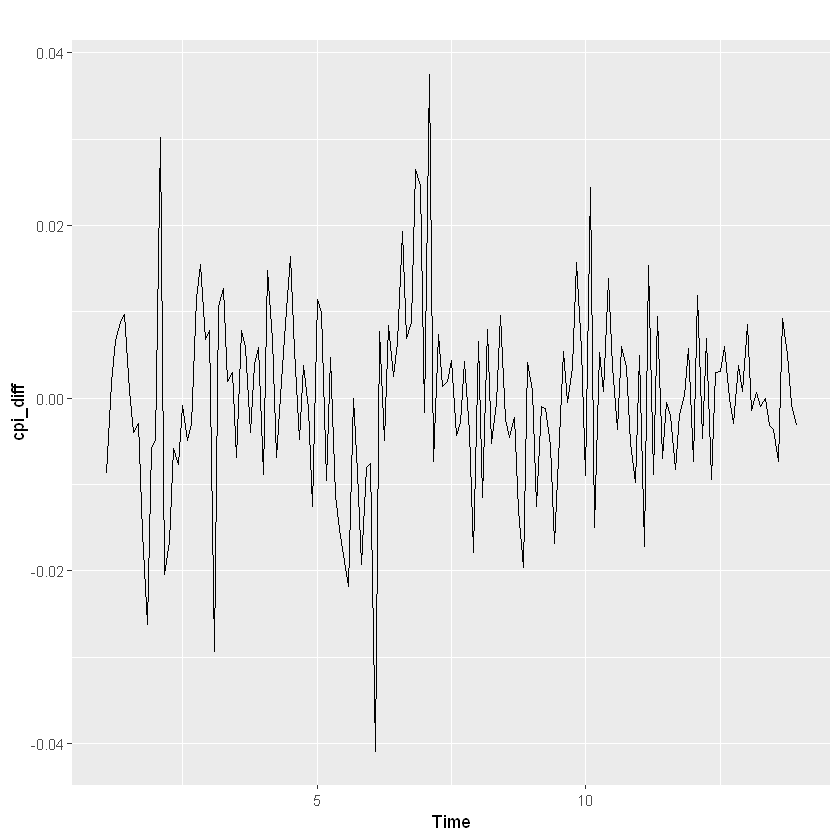

In [130]:
# autoplot(cpi_diff)

In [108]:
# Then we lag the response varibale into the dataset
lag_transform <- function(x, k= k){
    
      lagged =  c(rep(NA, k), x[1:(length(x)-k)])
      DF = as.data.frame(cbind(x, lagged))
      colnames(DF) <- c('cpi', paste0('cpi-', k))
      DF[is.na(DF)] <- 0
      return(DF)
}

cpi_lag <- lag_transform(lncpi, 1)
head(cpi_lag)

,cpi,cpi-1
,<dbl>,<dbl>
1,0.02750665,0.00000000
2,0.01878454,0.02750665
3,0.02059906,0.01878454
4,0.02734545,0.02059906
5,0.03608388,0.02734545
6,0.04579466,0.03608388


In [109]:
cpi_scale <- scale_new(cpi_lag)
cpi_whole <- cbind(cpi_scale, X_ts_scale)
head(cpi_whole)


,cpi,cpi-1,规模以上工业增加值_当期同比实际增速,发电量_当期同比增速,原煤产量_当期同比增速,焦炭产量_当期同比增速,粗钢产量_当期同比增速,钢材产量_当期同比增速,原油产量_当期同比增速,乙烯产量_当期同比增速,⋯,美国联邦基金利率日_一阶差分,美国标准普尔500指数收盘价收益率,美国纳斯达克综合指数收盘价收益率,美国道琼斯工业平均指数收盘价收益率,CRB现货指数食品收益率,CRB现货指数家畜收益率,CRB现货指数金属收益率,CRB现货指数工业原料收益率,CRB现货指数纺织品收益率,波罗的海干散货指数BDI收益率
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.8127493,0.6367976,0.1011236,0.6759259,0.3010721,0.6046590,0.7153445,0.6785168,0.5930736,0.3818722,⋯,0.8078925,0.7041852,0.7254387,0.6378073,0.6809099,0.5953677,0.8559139,0.8110996,0.6576389,0.6661959
2,0.7569566,0.8127493,1.0000000,0.6759259,0.6021442,0.6404973,0.8164056,0.8520156,0.7229437,0.3893016,⋯,0.8056006,0.6868418,0.5694799,0.6618528,0.7699654,0.4616773,0.8181850,0.6116240,0.4318110,0.6164788
3,0.7685635,0.7569566,0.7865169,0.5037037,0.4831840,0.6270579,0.6749200,0.6632080,0.4848485,0.4056464,⋯,0.7924986,0.5874150,0.5696253,0.5353413,0.7628707,0.6782992,0.7788514,0.7744567,0.5380705,0.5570397
4,0.8117182,0.7685635,0.7696629,0.5185185,0.5169628,0.5934595,0.6328112,0.6087770,0.5194805,0.4294205,⋯,0.7991567,0.5858900,0.5049422,0.5714665,0.5758365,0.6519408,0.6473289,0.6803439,0.4300238,0.5140660
5,0.8676152,0.8117182,0.6797753,0.5259259,0.4684976,0.5867398,0.5098535,0.4488859,0.5324675,0.4249629,⋯,0.7976024,0.6864115,0.7358220,0.6093801,0.5627348,0.5991673,0.5664200,0.5655612,0.6134795,0.4625258
6,0.9297321,0.8676152,0.6067416,0.4833333,0.4244382,0.5441819,0.5182752,0.5050179,0.5930736,0.3937593,⋯,0.8147441,0.7066179,0.7235458,0.7230849,0.4800029,0.6382363,0.5834909,0.5867737,0.3468443,0.4668408


In [110]:
dim(cpi_whole)
length(cpi_whole)

[1] 156 153

[1] 153

In [111]:
# then I set the data into training data and test data
train = cpi_whole[1:132, ]
test  = cpi_whole[133:nrow(cpi_whole),  ]

In [112]:
dim(train)

[1] 132 153

In [113]:
y_train = as.matrix(train[, 1])
x_train = as.matrix(train[, 2:153])

y_test = as.matrix(test[, 1])
x_test = as.matrix(test[, 2:length(test)])

In [114]:
is.matrix(x_train)

[1] TRUE

In [115]:
head(x_train)

,cpi-1,规模以上工业增加值_当期同比实际增速,发电量_当期同比增速,原煤产量_当期同比增速,焦炭产量_当期同比增速,粗钢产量_当期同比增速,钢材产量_当期同比增速,原油产量_当期同比增速,乙烯产量_当期同比增速,十种有色金属产量_当期同比增速,⋯,美国联邦基金利率日_一阶差分,美国标准普尔500指数收盘价收益率,美国纳斯达克综合指数收盘价收益率,美国道琼斯工业平均指数收盘价收益率,CRB现货指数食品收益率,CRB现货指数家畜收益率,CRB现货指数金属收益率,CRB现货指数工业原料收益率,CRB现货指数纺织品收益率,波罗的海干散货指数BDI收益率
1,0.6367976,0.1011236,0.6759259,0.3010721,0.6046590,0.7153445,0.6785168,0.5930736,0.3818722,0.5303293,⋯,0.8078925,0.7041852,0.7254387,0.6378073,0.6809099,0.5953677,0.8559139,0.8110996,0.6576389,0.6661959
2,0.8127493,1.0000000,0.6759259,0.6021442,0.6404973,0.8164056,0.8520156,0.7229437,0.3893016,0.6221837,⋯,0.8056006,0.6868418,0.5694799,0.6618528,0.7699654,0.4616773,0.8181850,0.6116240,0.4318110,0.6164788
3,0.7569566,0.7865169,0.5037037,0.4831840,0.6270579,0.6749200,0.6632080,0.4848485,0.4056464,0.6568458,⋯,0.7924986,0.5874150,0.5696253,0.5353413,0.7628707,0.6782992,0.7788514,0.7744567,0.5380705,0.5570397
4,0.7685635,0.7696629,0.5185185,0.5169628,0.5934595,0.6328112,0.6087770,0.5194805,0.4294205,0.6187175,⋯,0.7991567,0.5858900,0.5049422,0.5714665,0.5758365,0.6519408,0.6473289,0.6803439,0.4300238,0.5140660
5,0.8117182,0.6797753,0.5259259,0.4684976,0.5867398,0.5098535,0.4488859,0.5324675,0.4249629,0.5701906,⋯,0.7976024,0.6864115,0.7358220,0.6093801,0.5627348,0.5991673,0.5664200,0.5655612,0.6134795,0.4625258
6,0.8676152,0.6067416,0.4833333,0.4244382,0.5441819,0.5182752,0.5050179,0.5930736,0.3937593,0.4384749,⋯,0.8147441,0.7066179,0.7235458,0.7230849,0.4800029,0.6382363,0.5834909,0.5867737,0.3468443,0.4668408


In [116]:
m <- ncol(x_train)
dim(x_train) <- c(132, 1, m)

In [117]:

# specify required arguments
X_shape2 = dim(x_train)[2]
X_shape3 = dim(x_train)[3]
batch_size = 1                # must be a common factor of both the train and test samples
units = 1 

In [118]:
model <- keras_model_sequential() 
model%>%
  layer_lstm(units, batch_input_shape = c(batch_size, X_shape2, X_shape3), stateful= TRUE)%>%
  layer_dense(units = 1)

In [119]:
# Compile the model
model %>% compile(
  loss = 'mse',
  optimizer = optimizer_adam(),
  metrics = c('accuracy')
)

In [120]:
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 lstm (LSTM)                        (1, 1)                          616         
 dense (Dense)                      (1, 1)                          2           
Total params: 618
Trainable params: 618
Non-trainable params: 0
________________________________________________________________________________


In [121]:
# Train the model
Epochs = 50  
for(i in 1:Epochs ){
  model %>% fit(x_train, y_train, epochs=1, batch_size=1, verbose=1, shuffle=FALSE)
  model %>% reset_states()
}

In [122]:
## inverse-transform
invert_scaling = function(scaled, scaler, feature_range = c(0, 1)){
  min = scaler[1]
  max = scaler[2]
  t = length(scaled)
  mins = feature_range[1]
  maxs = feature_range[2]
  inverted_dfs = numeric(t)
  
  for( i in 1:t){
    X = (scaled[i]- mins)/(maxs - mins)
    rawValues = X *(max - min) + min
    inverted_dfs[i] <- rawValues
  }
  return(inverted_dfs)
}

In [124]:
# make prediction
L = nrow(x_test)
scaler = Scaled$scaler
predictions = numeric(L)

for(i in 1:L){
     X = x_test[i, ]
     dim(X) = c(1,1,m)
     yhat = model %>% predict(X, batch_size=batch_size)
     # invert scaling
     yhat = invert_scaling(yhat, scaler,  c(-1, 1))
     # invert differencing
     yhat  = yhat + lncpi[(132+i)]
     # store
     predictions[i] <- yhat
}

ERROR: Error in eval(expr, envir, enclos): object 'Scaled' not found


### Becuse the results is not so good, I delete parts of the code, here I delete the inverse function and the original function to run the scale.

In [405]:
length(predictions)
predictions

[1] 24

[1] 0.4853663 0.5874536 0.5410479 0.5665197 0.5720556 0.5744615 0.5891229
 [8] 0.6395601 0.6361500 0.5245720 0.5082413 0.6215068 0.7116264 0.7123680
[15] 0.7607630 0.8116604 0.8103545 0.7559659 0.7362710 0.6766101 0.7664438
[22] 0.8135780 0.8530457 0.8256952

In [407]:
length(y_test)

[1] 24

In [408]:
lstm_rss <- var(y_test - predictions)
lstm_tss <- var(y_test)
lstm_rsq <- 1 - (lstm_rss / lstm_tss)
lstm_rss
lstm_tss
lstm_rsq

0.006355774


0.002308742


-1.752916


In [409]:
lncpi[(length(lncpi) - length(predictions) + 1):length(lncpi)]

[1] -0.0170237814 -0.0051135916 -0.0098155480 -0.0028527883 -0.0122725020
 [6] -0.0093261364 -0.0062763764 -0.0002941898 -0.0002952320 -0.0032533178
[11]  0.0004927808  0.0012798427  0.0097773728  0.0083452450  0.0090338399
[16]  0.0080455693  0.0079697377  0.0048211831  0.0011798251 -0.0060993795
[21]  0.0031446567  0.0081625078  0.0074605235  0.0043196611

## But I found a written package to do LSTM in R, I run LSTM later by the code following:

In [128]:
library(TSLSTM)

In [129]:
head(X[, 1:28])

month,规模以上工业增加值_当期同比实际增速,发电量_当期同比增速,原煤产量_当期同比增速,焦炭产量_当期同比增速,粗钢产量_当期同比增速,钢材产量_当期同比增速,原油产量_当期同比增速,乙烯产量_当期同比增速,十种有色金属产量_当期同比增速,⋯,房地产开发企业新增固定资产_当期实际同比增速,房地产开发投资_住宅_当期实际同比增速,房地产开发企业房屋施工面积_当期同比增速,房地产开发企业房屋竣工面积_当期同比增速,房地产开发企业商品房销售面积_当期同比增速,房地产开发企业商品房销售额_当期实际同比增速,房地产开发企业购置土地面积_当期同比增速,国房景气指数_当期,消费者预期指数_当期_一阶差分,消费者满意指数_当期_一阶差分
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.8,10.74,10.81,16.7,14.82,15.9,0.7,25.9,12.7,⋯,10.27205,-1.718617,5.85296,11.15378,7.948743,6.838611,31.192800,103.65,0.5,0.0
2,19.8,23.00,16.11,22.6,19.02,19.8,1.3,16.9,17.9,⋯,10.27205,-1.718617,5.85296,11.15378,7.948743,6.838611,31.192800,103.94,0.1,0.2
3,16.9,16.22,16.86,12.4,18.53,14.9,1.8,13.1,17.0,⋯,52.52615,35.634300,22.67980,25.74326,27.351880,32.452130,14.470640,104.15,-0.4,-0.1
4,14.9,14.14,14.88,23.2,21.78,16.4,3.0,9.7,14.9,⋯,33.75165,18.972630,12.43416,24.99733,22.836230,33.408450,9.018992,104.30,-12.0,-8.1
5,13.7,13.38,18.68,19.5,20.93,15.6,2.4,18.9,17.2,⋯,13.73498,16.935470,46.32653,52.32079,43.511140,48.758230,194.722400,104.46,-4.2,-2.5
6,16.9,13.05,21.39,24.2,23.45,19.8,2.7,10.5,23.7,⋯,34.29339,32.410120,26.53339,36.84499,36.376030,36.551270,48.902440,104.62,3.6,3.4


In [130]:
x_scale <- scale_new(X)
lncpi_scale <- scale_new(lncpi)

In [131]:
y_train = as.matrix(train[, 1])
x_train = as.matrix(train[, 2:153])

y_test = as.matrix(test[, 1])
x_test = as.matrix(test[, 2:length(test)])

dim(y_train)
dim(x_train)

[1] 132   1

[1] 132 152

In [136]:
dim(train)
dim(test)

[1] 132 153

[1]  24 153

In [146]:
lncpi_scale <- scale(lncpi)
cpi_tslm <-ts.lstm(ts=lncpi_scale ,xreg = X_pca, tsLag=1, xregLag = 0, LSTMUnits=20, Epochs=50, SplitRatio = 0.84)

Model: "sequential_5"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 lstm_5 (LSTM)                      (None, 1, 20)                   5120        
 dense_5 (Dense)                    (None, 1, 1)                    21          
Total params: 5,141
Trainable params: 5,141
Non-trainable params: 0
________________________________________________________________________________


In [147]:
cpi_tslm$TestPredictedValue
length(cpi_tslm$TestPredictedValue)

, , 1

              [,1]
 [1,] -0.731589956
 [2,] -0.672095415
 [3,] -0.124067118
 [4,] -0.721001078
 [5,] -0.318048984
 [6,] -0.348633591
 [7,] -0.670761636
 [8,] -0.315547053
 [9,]  0.075991826
[10,] -0.066040726
[11,] -0.507624063
[12,] -0.305996484
[13,] -0.201181503
[14,]  0.269755193
[15,]  0.022118085
[16,]  0.233678023
[17,]  0.260962360
[18,]  0.433780199
[19,]  0.278515018
[20,]  0.106422198
[21,] -0.178091588
[22,] -0.003409204
[23,]  0.050735324
[24,]  0.179990648

[1] 24

In [148]:
lstm_rss <- var(lncpi_scale[133:156] - cpi_tslm$TestPredictedValue)
lstm_tss <- var(lncpi_scale[133:156])
lstm_rsq <- 1 - (lstm_rss / lstm_tss)
lstm_rss
lstm_tss
lstm_rsq

[1] 0.07572231

[1] 0.05545122

[1] -0.365566